<a href="https://colab.research.google.com/github/seupedro7/Trainee-CIS/blob/main/Trainee_CIS_Parte_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Trainee CIS - Parte 4
Pedro Henrique S. Oliveira - 18/0056948

Nesse notebook iremos trabalhar com uma base dados em PCA de dados de cartão de crédito, com a intencão de prever se certas transações são ou não fraudes.

Para isso, iremos implementar um Perceptron, ou seja, um unico neurônio, em numpy de forma à realizar essa previsão.

In [1]:
import seaborn as sns 
import statistics as stat
import string as st
import pandas as pd 
import numpy as np  
import matplotlib as mat
import matplotlib.pyplot as plt

import colorsys
plt.style.use('seaborn-talk')
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
from google.colab import files
up = files.upload()

Saving creditcard.csv to creditcard.csv


In [3]:
df = pd.read_csv('creditcard.csv')
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,1.772925e-15,9.289524e-16,-1.803266e-15,1.674888e-15,1.475621e-15,3.501098e-15,1.392460e-15,-7.466538e-16,4.258754e-16,9.019919e-16,5.126845e-16,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
df = df.drop_duplicates()
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


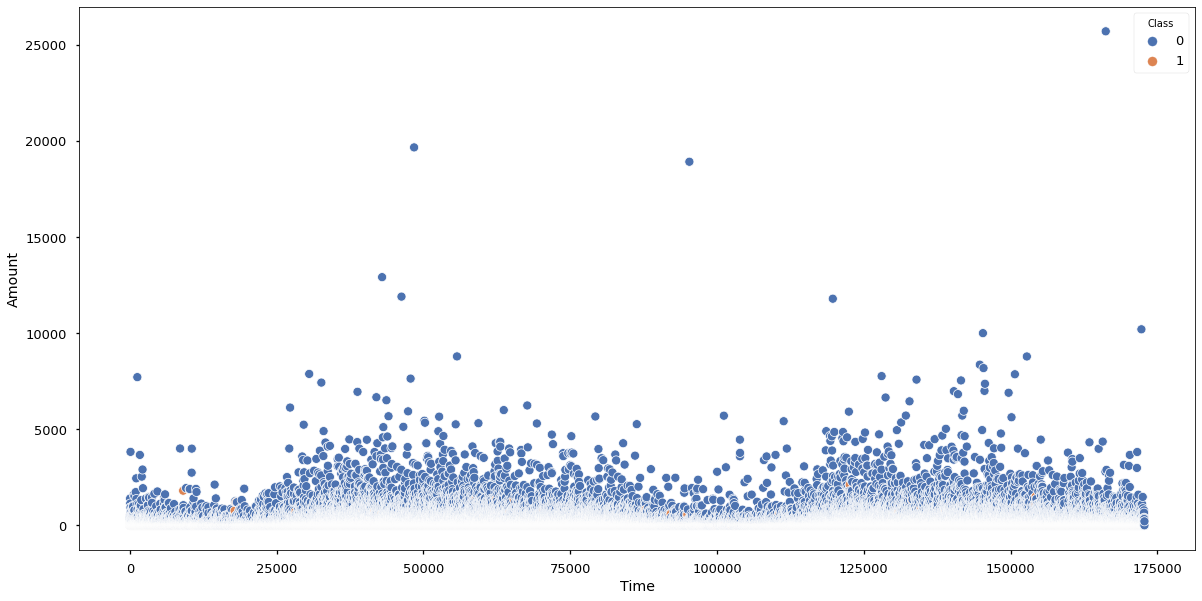

In [ ]:
plt.figure(figsize=(20,10))
sns.scatterplot(x = 'Time',y = 'Amount', data = df, hue = 'Class',palette='deep')
plt.show()
#grafico de Dinheiro das transaçoes no tempo e as transações fraudadas


##Tratamento dos dados

In [5]:
from sklearn.model_selection import train_test_split
target = "Class"
X = df.loc[:, df.columns != target]
y = df.loc[:, df.columns == target]
X_train, X_test , y_train ,y_test = train_test_split(X,y,test_size=0.33,random_state =42)

0    283253
1       473
Name: Class, dtype: int64


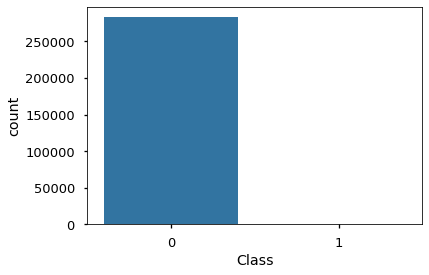

In [6]:
ax = sns.countplot(x="Class",data=df)
print(df["Class"].value_counts())

Percebemos aqui e no primeiro grafico que temos muito mais valores de 0(transações normais) do que de 1(transações fraudadas), assim, precisamos realizar algumas tecnicas.

In [7]:
classe_menor_len = len(df[df[target]==1])
print(classe_menor_len)

473


In [8]:
classe_maior_id = df[df[target]==0].index
print(classe_maior_id)

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            284797, 284798, 284799, 284800, 284801, 284802, 284803, 284804,
            284805, 284806],
           dtype='int64', length=283253)


In [9]:
random_mi = np.random.choice(classe_maior_id,classe_menor_len,replace = False)
print(len(random_mi))

473


In [10]:
classe_menor_id = df[df[target]==1].index
print(classe_menor_id)

Int64Index([   541,    623,   4920,   6108,   6329,   6331,   6334,   6336,
              6338,   6427,
            ...
            274382, 274475, 275992, 276071, 276864, 279863, 280143, 280149,
            281144, 281674],
           dtype='int64', length=473)


In [11]:
undersample_id = np.concatenate([classe_menor_id,random_mi])

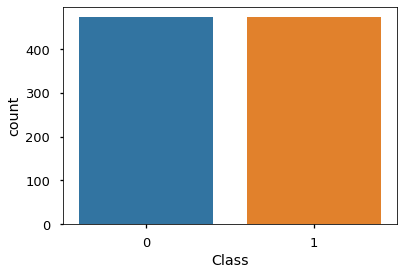

In [12]:
undersample = df.loc[undersample_id]
sns.countplot(x="Class",data=undersample)

Realizamos aqui um undersampling, onde reduzimos o numero de ocorrencias da classe 0 para o mesmo tanto de ocorrencias da classe 1.
Agora estes dados se tornam mais adequados para realizarmos o algoritmo de machine learnig.

In [13]:
df_drop = df[:-270000]
df_drop.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,13726.000000,13726.000000,13726.000000,13726.000000,13726.000000,13726.000000,13726.000000,13726.000000,13726.000000,13726.000000,13726.000000,13726.000000,13726.000000,13726.000000,13726.000000,13726.000000,13726.000000,13726.000000,13726.000000,13726.000000,13726.000000,13726.000000,13726.000000,13726.000000,13726.000000,13726.000000,13726.000000,13726.000000,13726.000000,13726.000000,13726.000000
mean,9947.679878,-0.228926,0.280155,0.850273,0.297164,-0.118529,0.126411,-0.156150,-0.015242,0.985498,-0.339992,0.862636,-1.554513,1.004094,0.844018,-0.185227,-0.036598,0.416888,0.001980,-0.085845,0.021975,-0.069016,-0.154260,-0.035968,0.012610,0.115792,0.037076,0.013080,0.001850,63.746443,0.004080
std,7608.222841,1.706230,1.383606,1.550771,1.499016,1.286636,1.320710,1.233447,1.255901,1.210440,1.216410,1.189410,1.537610,1.161475,1.337678,0.978487,0.967006,1.219827,0.844129,0.824146,0.575778,0.867703,0.620461,0.495933,0.586739,0.426345,0.559851,0.391198,0.254807,177.522991,0.063746
min,0.000000,-27.670569,-34.607649,-24.667741,-4.657545,-32.092129,-23.496714,-26.548144,-23.632502,-7.175097,-14.166795,-2.595325,-17.769143,-3.389510,-19.214325,-4.152532,-12.227189,-18.587366,-8.061208,-4.932733,-13.276034,-11.468435,-8.593642,-19.254328,-2.512377,-4.781606,-1.338556,-7.976100,-3.575312,0.000000,0.000000
25%,2944.000000,-0.966491,-0.283735,0.411371,-0.625868,-0.717376,-0.623135,-0.613819,-0.180836,0.286039,-0.789735,0.069306,-2.470643,0.194114,0.264133,-0.760653,-0.525671,-0.058830,-0.436171,-0.572225,-0.161283,-0.269993,-0.545219,-0.173299,-0.337527,-0.135887,-0.376104,-0.077015,-0.014920,5.520000,0.000000
50%,8881.500000,-0.319102,0.251922,0.963426,0.216677,-0.191100,-0.146966,-0.111779,0.017771,0.969694,-0.382302,0.796598,-1.863832,1.099376,1.121552,-0.045005,0.032966,0.409512,0.055267,-0.086659,-0.037705,-0.131485,-0.119546,-0.045072,0.061086,0.154101,-0.033296,-0.000840,0.016123,15.745000,0.000000
75%,16470.000000,1.162804,0.881595,1.608318,1.188136,0.347768,0.505841,0.418829,0.265311,1.648937,0.119791,1.662620,-0.409642,1.861350,1.563038,0.489578,0.534817,0.891082,0.496882,0.433885,0.138658,0.018686,0.229661,0.069452,0.393048,0.391213,0.377973,0.098545,0.072003,52.000000,0.000000
max,24429.000000,1.960497,10.558600,4.101716,11.927512,34.099309,21.393069,34.303177,10.535558,10.392889,12.259949,12.018913,3.774837,4.465413,7.692209,3.635042,4.816252,9.253526,4.295648,4.555359,8.012574,22.614889,4.534454,13.876221,3.200201,5.525093,3.517346,8.254376,4.860769,7712.430000,1.000000


In [14]:

X = df_drop.loc[:, df.columns != target]
y = df_drop.loc[:, df.columns == target]
X_train, X_test , y_train ,y_test = train_test_split(X,y,test_size=0.33,random_state =42)

In [15]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(random_state=42)
X_r,y_r = oversample.fit_resample(X,y)


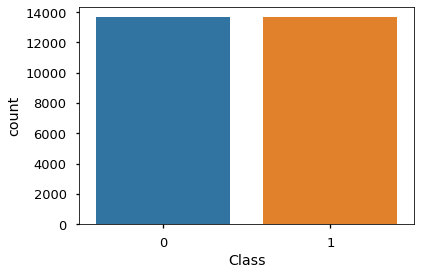

In [16]:
sns.countplot(x="Class",data=y_r)

E aqui aplicamos uma tecnica de oversample em cima de uma redução do nosso dataframe, com isso podemos testar para ambos os casos, under e over sampled.

## Algoritmo de um Perceptron em Numpy para classificação binária


O Perceptron é a forma mais simples da configuração de uma rede neural artificial, uma vez que é constituída de uma única camada neural e de um único neurônio. 

In [40]:
class Perceptron():

  def __init__(self,nfeatures):
    self.nfeatures = nfeatures
    self.pesos = np.zeros((nfeatures,1),dtype=np.float)
    self.bias = np.zeros(1,dtype=np.float)

  def forward_prop(self,x): #função para forward propagation
    linear = np.dot(x, self.pesos) + self.bias 
    prev = np.where(linear > 0., 1, 0)
    return prev

  def back_prop(self,x,y):  #função para backpropagation
    prev = self.forward_prop(x)
    errors = y - prev 
    return errors

  def fit(self, x, y, epochs):  #função de treinamento
    for e in range(epochs):   
        for i in range(y.shape[0]):
              errors = self.back_prop(x[i].reshape(1, self.nfeatures), y[i]).reshape(-1)
              self.pesos += (errors * x[i]).reshape(self.nfeatures, 1)
              self.bias += errors  

  def score(self, x, y):  #função de avaliação do modelo
    prev = self.forward_prop(x).reshape(-1)
    accuracy = np.sum(prev == y) / y.shape[0]
    return accuracy 

In [59]:
X = undersample[['V1',	'V2',	'V3',	'V4'	,'V5',	'V6',	'V7',	'V8',	'V9',	'V10'	,'V11',	'V12'	,'V13',	'V14'	,'V15',	'V16',	'V17',	'V18'	,'V19'	,'V20'	,'V21'	,'V22',	'V23',	'V24',	'V25',	'V26',	'V27'	,'V28',	'Amount']	]

X = X.to_numpy()

y = undersample['Class']

y = y.to_numpy()



X_train, X_test , y_train ,y_test = train_test_split(X,y,random_state =42)



In [44]:
ppn = Perceptron(nfeatures=29)

ppn.fit(X_train, y_train, epochs=50)

print('Parâmetros:\n\n')
print('  Pesos: %s\n' % ppn.pesos)
print('  Bias: %s\n' % ppn.bias)

Parâmetros:


  Pesos: [[ -837.21819337]
 [  411.55779163]
 [-2081.10901415]
 [ 2385.32671089]
 [ -943.46308571]
 [ -335.90250203]
 [ -850.60491236]
 [ -179.33362879]
 [  104.83817071]
 [-2552.68115882]
 [ 1490.79672473]
 [-2467.47903512]
 [ -337.72149023]
 [-3034.40452083]
 [ -404.72633545]
 [-2455.48373398]
 [-3188.898466  ]
 [-1013.71593112]
 [  453.63391357]
 [  -54.79111236]
 [  247.91784067]
 [  -94.7064424 ]
 [ -317.16037731]
 [ -408.978565  ]
 [ -169.98768269]
 [ -277.80018962]
 [   95.17024655]
 [   94.59230954]
 [ 1043.02      ]]

  Bias: [-2793.]



In [45]:
test_acc = ppn.score(X_test, y_test)
print('Test set accuracy: %.2f%%' % (test_acc*100))

Test set accuracy: 58.23%


Obtemos uma acuracia de 58% no dataset de testes para o caso undersampled.

In [54]:

X_train, X_test , y_train ,y_test = train_test_split(X_r,y_r)
print('Shape do treino')
print("Antes: ", X_train.shape)
print("Antes: ", y_train.shape)



print ('Shape do teste: ', X_test.shape)


Shape do treino
Antes:  (20505, 30)
Antes:  (20505, 1)
Shape do teste:  (6835, 30)


In [57]:
ppnx = Perceptron(nfeatures=29)

ppnx.fit(X_train, y_train, epochs=50)

print('Parâmetros:\n\n')
print('  Pesos: %s\n' % ppn.pesos)
print('  Bias: %s\n' % ppn.bias)

Parâmetros:


  Pesos: [[ -837.21819337]
 [  411.55779163]
 [-2081.10901415]
 [ 2385.32671089]
 [ -943.46308571]
 [ -335.90250203]
 [ -850.60491236]
 [ -179.33362879]
 [  104.83817071]
 [-2552.68115882]
 [ 1490.79672473]
 [-2467.47903512]
 [ -337.72149023]
 [-3034.40452083]
 [ -404.72633545]
 [-2455.48373398]
 [-3188.898466  ]
 [-1013.71593112]
 [  453.63391357]
 [  -54.79111236]
 [  247.91784067]
 [  -94.7064424 ]
 [ -317.16037731]
 [ -408.978565  ]
 [ -169.98768269]
 [ -277.80018962]
 [   95.17024655]
 [   94.59230954]
 [ 1043.02      ]]

  Bias: [-2793.]



In [58]:
test_acc = ppn.score(X_test, y_test)
print('Test set accuracy: %.2f%%' % (test_acc*100))

Test set accuracy: 58.23%


E, para o caso oversampled, obtivemos aproximadamente a mesma acuracia de 58%.